# Simple K Means Clustering Example

The K Means algorithm is by far the most widely used algorithm in the field of unsupervised learning.  It has a nice geometric interpretation and forms the basis of our understanding of more complex unsupervised learning algorithms.  

The basic idea behind K Means is to find K "clusters" of data.  Clusters are simply groups of points that are close together in space.  For a 2D feature vector with floating point values, this is very easy to see, and the generalization to higher dimensional vectors is straightforward.  

The process is simple:
1. Randomly assign Centroids
2. Compute distances of every point to every center
3. Each Point is assigned to the closest Centroid
4. Take all points of each cluster, compute the average, or "mean" position.  These new positions (the K-Means) are assigned to be the centroid.
5. Rinse and Repeat until the location of the Centroid is unchanged.


Let's import our Libraries.  This is a simple example so we don't need to use a scalable framework.

In [3]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

## Creating a set of clusters with known assignments

We want to see if the K Means algorithm will reproduce assignments that we have given to the data.  To this end, we are picking 5 data points at random and making them our "True Centers".  After that, we're going to add some Gaussian noise to these points.  You can imagine that a small amount of noise would create very distinct, easily identified clusters, while a large amount of noise will create more diffuse clusters that might even overlap with each other and confound the algorithm.  

In [32]:
numCenters = 5
numPoints = 100

np.random.seed(0) #setting random seed for reproduceability

# picking true centers at random over a 1x1 cartesian grid
centerLocations = np.random.uniform(0,1,(numCenters,2))  

# generating a noise vector with stdev=0.075.  
# You can adjust this sligthtly to see how it performs!
noise = np.random.normal(0,0.075,(numPoints,2))

# picks a random center (uniformly).  This tells us which center each point will be generated from.
whichCenter = np.random.randint(0,5,numPoints)

# initialization of data points
X = np.zeros((numPoints,2))

#Assigning centroids randomly to each point
for i in range(numPoints):
    X[i,:] = centerLocations[whichCenter[i],:] 

#Adding noise to each point
X += noise  

Now we can carry out the clustering by calling the KMeans method in pandas.  For our purposes, we will call the centers returned by K Means "centroids", while our ground truch centers are simply "centers".

In [33]:
kmeans = KMeans(n_clusters=numCenters, random_state=0).fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [4, 4]])
print("Original Centers")
print(centerLocations)
print()
print("K Means Cluster Centroids")
print(kmeans.cluster_centers_)


Original Centers
[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]]

K Means Cluster Centroids
[[0.44291174 0.91496339]
 [0.63497098 0.5214454 ]
 [0.96880647 0.41444805]
 [0.37089588 0.69445189]
 [0.52113921 0.70941541]]


Upon inspection, we see that our original centers seem to match up with the K Means centroids, but they are out of order.  This is an annoying but important detail, and we will need to create a mapping that tells us the correspondence between the two points.  We can do this by simply finding the points that are closest to each other.

In [34]:
#need to make a map betweeen predicted clusters and actual centroids
kn2pr=[]  #known location of center to location found in kmeans.
for i in range(numCenters):
    index = np.argmin([ np.linalg.norm(centerLocations[i,:]-kmeans.cluster_centers_[j,:]) for j in range(numCenters)])
    kn2pr.append(index)

print(kn2pr)

#trivial mapping is here (this is used in a function later)
kn2kn = [i for i in range(numCenters)]
print(kn2kn)

[4, 1, 3, 0, 2]
[0, 1, 2, 3, 4]


We will define a plotting function to avoid repeating the plot commands to display the functions.

In [35]:
#import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
#import numpy as np

np.random.seed(101)
curves = [np.random.random(20) for i in range(numCenters)]
values = range(numCenters)

def plotClusters(centerList, titleString, kn2X ):
    
    # TODO:  Document this!
    # https://stackoverflow.com/questions/8931268/using-colormaps-to-set-color-of-line-in-matplotlib
    values = range(numCenters)
    jet = cm = plt.get_cmap('jet') 
    cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    legendArray=[]

    for i in range(numCenters):
        line = curves[i]
        colorVal = scalarMap.to_rgba(values[i])
        plt.plot(kmeans.cluster_centers_[kn2pr[i],0],kmeans.cluster_centers_[kn2pr[i],1], 'x',color=colorVal)
        line = curves[i]
        colorVal = scalarMap.to_rgba(values[i])
        legendArray.append("c# " + str(i))

    for i in range(numCenters):
        line = curves[i]
        colorVal = scalarMap.to_rgba(values[i])

        Xplt = X[np.where(centerList==kn2X[i]),:][0]
        #print(Xplt)
        plt.plot(Xplt[:,0],Xplt[:,1],'.', color=colorVal)
        plt.plot(centerLocations[i,0], centerLocations[i,1],'d', color=colorVal)
        #plt.plot(kmeans.cluster_centers_[kn2pr[i],0],kmeans.cluster_centers_[kn2pr[i],1], 'x',color=colorVal)
        plt.title(titleString)
        plt.xlabel("$x_1$")
        plt.ylabel("$x_2$")
        plt.grid()
    plt.legend(legendArray)
    plt.show()  

We're generating 2 plots here:
1. The original "ground truth" clusters, which were generated by taking a point and adding noise to it.  The membership was defined by the original point.
2. The K Means predicted clusters, which are chosen simply by finding points close to each other and to a converged centroid location.


Which one is more accurate?  Have we developed good controls here?  

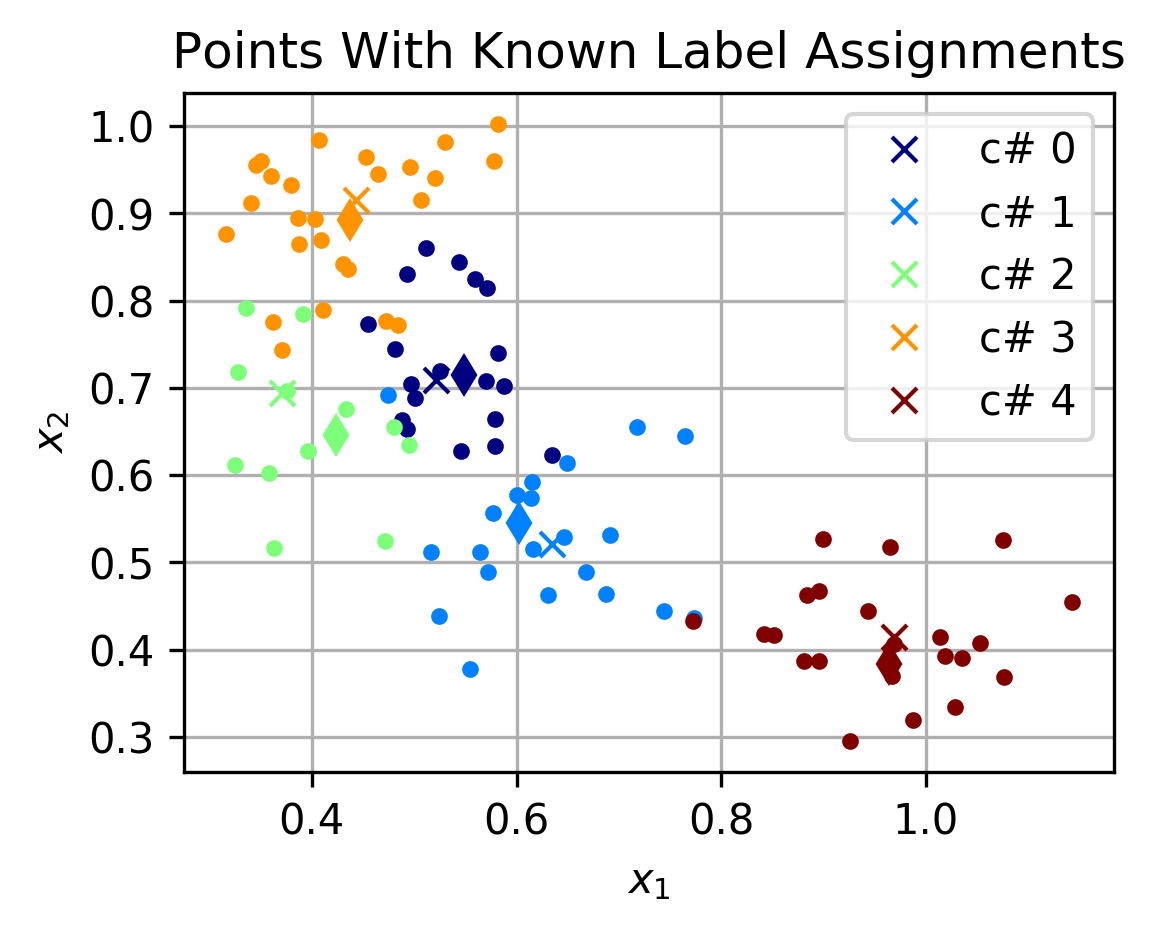

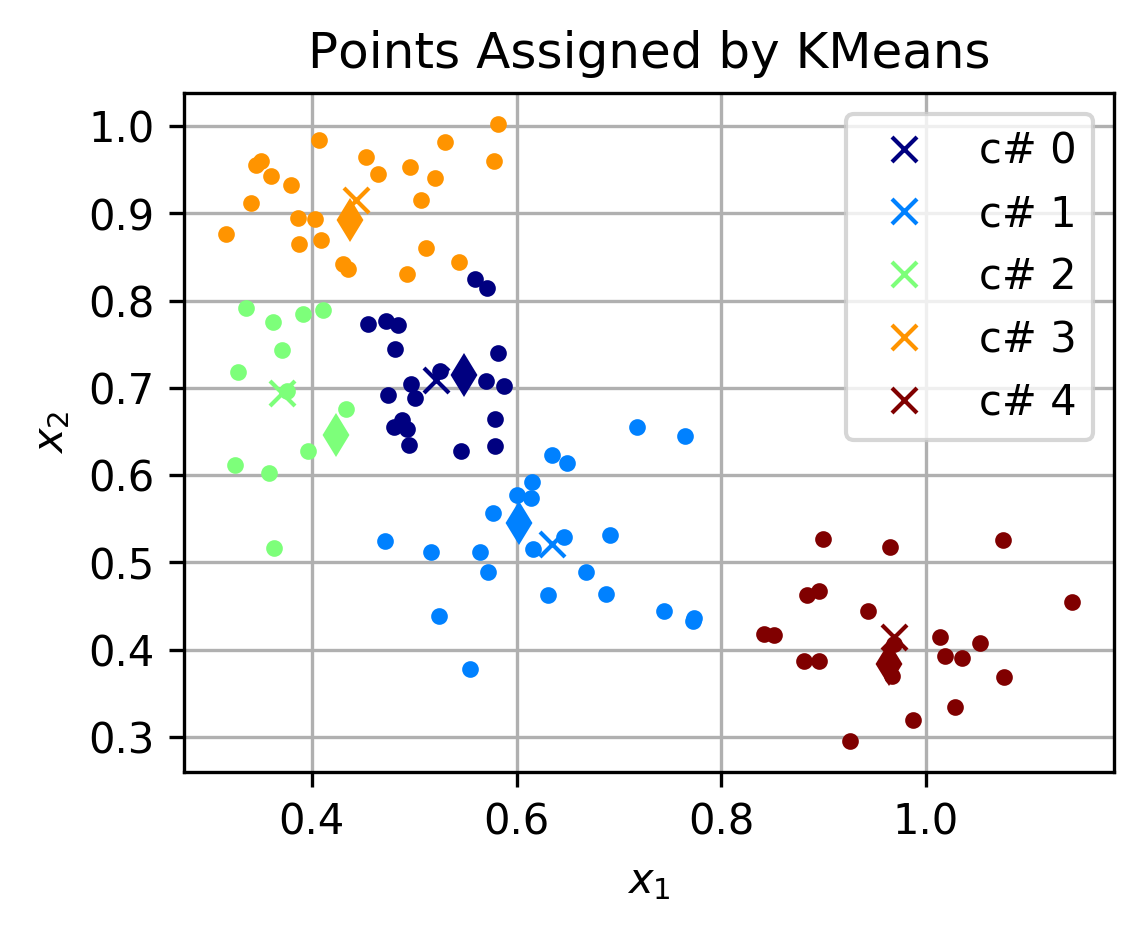

In [36]:
dpi = 300 #dots per square inch when plotting...higher resolution for publications.
plt.rcParams['figure.dpi']= dpi
plt.rcParams["figure.figsize"] = [4,3]

plt.clf()

# The first plot will have the centers and memberships from the generated dataset
plotClusters(whichCenter, "Points With Known Label Assignments",kn2kn)

# now, we're going to plot the results using the predicted cluster membership 
# from the K Means algorithm
whichCentroid=np.array([i for i in kmeans.predict(X)])
plotClusters(whichCentroid, "Points Assigned by KMeans", kn2pr)
